In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import missingno as msno

from xgboost import XGBClassifier
import xgboost as xgb

from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score


In [2]:
data = pd.read_excel('data.xls')

In [3]:
data

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1300,NaN
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,1570,1800.0
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,269.0,1004.0,NaN,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,30.0,16.0,NaN,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,74.0,38.0,NaN,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5622,0,2209,Q,34.0,NaN,NaN,0.0,1000.0,635.0,...,704.0,898.0,NaN,1000.0,1000.0,1301.0,1008.0,905.0,1300,1300.0
5622,5623,0,4304,I,64.0,40000.0,225.0,0.0,142425.0,3329.0,...,2258.0,952.0,8500.0,17803.0,7000.0,NaN,719.0,NaN,8500,8500.0
5623,5624,0,2704,Q,34.0,NaN,NaN,3.0,3500.0,0.0,...,7.0,7.0,NaN,3500.0,3500.0,NaN,6.0,NaN,2800,2800.0
5624,5625,0,2209,Q,41.0,NaN,NaN,0.0,0.0,0.0,...,316.0,1633.0,NaN,0.0,0.0,1971.0,1259.0,2101.0,2000,2000.0


In [4]:
#import ydata_profiling
#profile = ydata_profiling.ProfileReport(data)
#profile.to_file("output.html")

In [5]:
from category_encoders import TargetEncoder

In [6]:
NaCol = [col for col in data.columns if data[col].isnull().sum() > 2800]
naCol = data[NaCol].isnull().sum()

In [7]:
naCol

VAR_15    3825
VAR_32    3825
VAR_33    3825
VAR_40    4113
VAR_43    5592
VAR_46    3812
VAR_48    3320
dtype: int64

In [ ]:
data.drop('VAR_15', axis=1, inplace=True)
data.drop('VAR_32', axis=1, inplace=True)
data.drop('VAR_33', axis=1, inplace=True)
data.drop('VAR_40', axis=1, inplace=True)
data.drop('VAR_46', axis=1, inplace=True)
data.drop('VAR_48', axis=1, inplace=True)

In [35]:
data.drop('VAR_43', axis=1, inplace=True)

In [9]:
def col_names(dataframe, cat_th = 10):
    
    
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    
    cat_cols = cat_cols + num_but_cat
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    return cat_cols, num_cols


cat_cols, num_cols = col_names(data)

In [10]:
cat_cols

['VAR_2',
 'VAR_16',
 'VAR_22',
 'VAR_23',
 'VAR_36',
 'VAR_37',
 'VAR_TARGET',
 'VAR_26',
 'VAR_27',
 'VAR_35']

In [11]:
num_cols

['KEY',
 'VAR_1',
 'VAR_3',
 'VAR_4',
 'VAR_5',
 'VAR_6',
 'VAR_7',
 'VAR_8',
 'VAR_9',
 'VAR_10',
 'VAR_11',
 'VAR_12',
 'VAR_13',
 'VAR_14',
 'VAR_17',
 'VAR_18',
 'VAR_19',
 'VAR_20',
 'VAR_21',
 'VAR_24',
 'VAR_25',
 'VAR_28',
 'VAR_29',
 'VAR_30',
 'VAR_31',
 'VAR_34',
 'VAR_38',
 'VAR_39',
 'VAR_41',
 'VAR_42',
 'VAR_43',
 'VAR_44',
 'VAR_45',
 'VAR_47',
 'VAR_49',
 'VAR_50']

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
KEY,5626.0,2813.500000,1624.230638,1.0,1407.25,2813.5,4219.75,5626.0
VAR_TARGET,5626.0,0.043726,0.204502,0.0,0.00,0.0,0.00,1.0
VAR_1,5626.0,3257.151973,888.997086,1800.0,2606.00,3103.0,3707.00,7011.0
VAR_3,5622.0,33.639808,5.607477,1.0,34.00,34.0,34.00,81.0
VAR_4,4344.0,6513.402164,7635.750969,0.0,2000.00,4050.0,7900.00,81500.0
VAR_5,4344.0,3401.622238,4629.699543,0.0,800.00,1800.0,4200.00,45000.0
VAR_6,5612.0,0.617962,1.368544,0.0,0.00,0.0,1.00,31.0
VAR_7,5612.0,9748.699572,16482.921883,0.0,2000.00,5000.0,11062.50,304800.0
VAR_8,5612.0,4144.263899,8517.336280,0.0,616.50,2051.0,4715.75,178711.0
VAR_9,5612.0,1148.589095,2160.342345,0.0,160.00,582.0,1331.00,50203.0


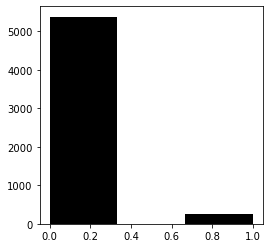

In [13]:
fig = plt.figure(figsize = (4, 4))

plt.hist(data["VAR_TARGET"],bins=3,color="black",range=[0,1])

plt.show()

In [14]:
data[data.duplicated()]

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_38,VAR_39,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_47,VAR_49,VAR_50


In [15]:
data.drop('VAR_50', axis=1, inplace=True)
data.drop('VAR_25', axis=1, inplace=True)
data.drop('VAR_47', axis=1, inplace=True)
data.drop('VAR_42', axis=1, inplace=True)

C:\Users\Beyza\AppData\Local\Temp\ipykernel_8228\2286602913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = data.corr()


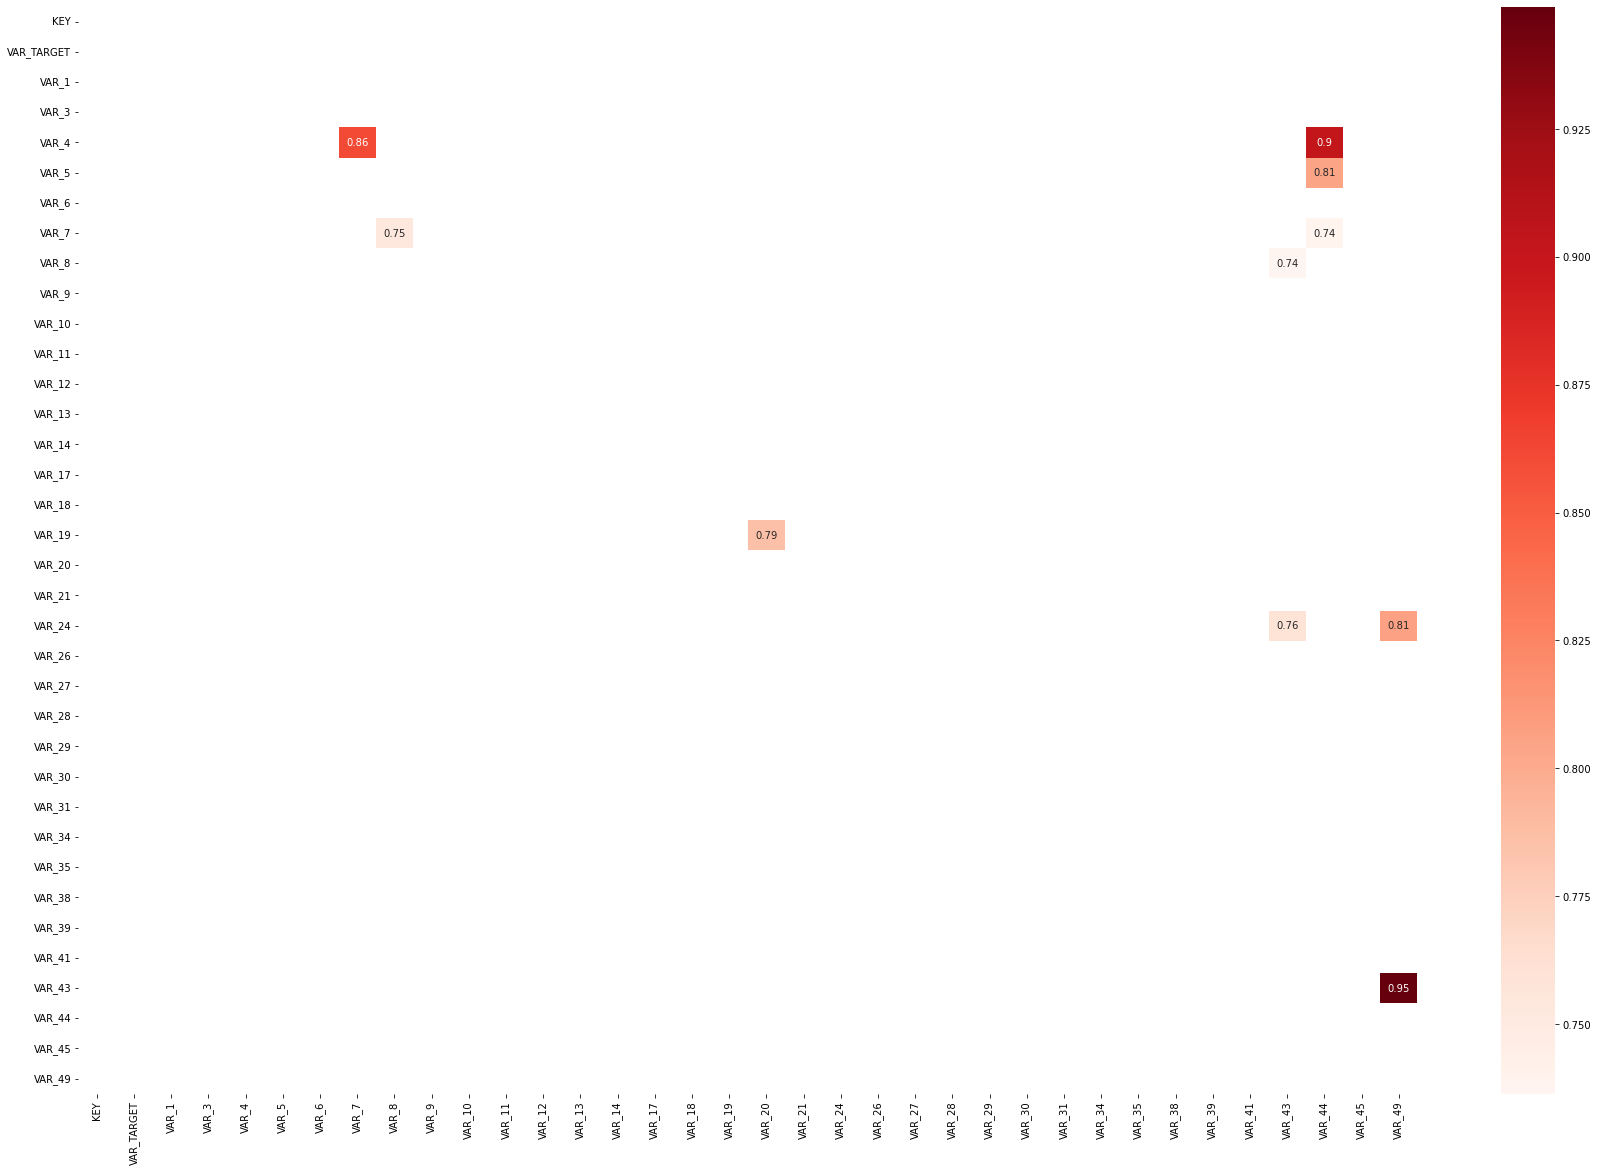

In [16]:
dfCorr = data.corr()

# Üst üçgensel matris oluşturma
mask = np.triu(np.ones_like(dfCorr, dtype=bool))

# Filtrelenmiş veri çerçevesini oluşturma
filteredDf = dfCorr[((dfCorr >= 0.7) | (dfCorr <= -0.7)) & (dfCorr != 1.000)]
filteredDf = filteredDf.where(mask)  # Sadece üst üçgensel kısmı koru

plt.figure(figsize=(30, 20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [17]:
# Yüksek korelasyona sahip sütun çiftlerini elde etme
high_corr_columns = []

for column in filteredDf.columns:
    correlated_columns = filteredDf[column].dropna().index.tolist()
    for correlated_column in correlated_columns:
        if column != correlated_column:
            correlation = filteredDf.loc[correlated_column, column]
            high_corr_columns.append((column, correlated_column, correlation))

# Yüksek korelasyona sahip sütun çiftlerini tablo halinde yazdırma
table = pd.DataFrame(high_corr_columns, columns=['C 1', 'C 2', 'Korelasyon Yüzdesi'])
table = table.sort_values(by='Korelasyon Yüzdesi', ascending=False)

print(table)


      C 1     C 2  Korelasyon Yüzdesi
9  VAR_49  VAR_43            0.948911
5  VAR_44   VAR_4            0.901120
0   VAR_7   VAR_4            0.860381
8  VAR_49  VAR_24            0.806573
6  VAR_44   VAR_5            0.805163
2  VAR_20  VAR_19            0.786979
4  VAR_43  VAR_24            0.759014
1   VAR_8   VAR_7            0.753228
7  VAR_44   VAR_7            0.738384
3  VAR_43   VAR_8            0.736355


In [18]:
data.corr()["VAR_TARGET"].abs().nlargest(5) 

C:\Users\Beyza\AppData\Local\Temp\ipykernel_8228\4160687010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["VAR_TARGET"].abs().nlargest(5)


VAR_TARGET    1.000000
KEY           0.338513
VAR_18        0.214010
VAR_44        0.099003
VAR_6         0.095395
Name: VAR_TARGET, dtype: float64

In [19]:
data

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_41,VAR_43,VAR_44,VAR_45,VAR_49
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,5.0,N,E,0.0,0,0.0,NaN,0.0,NaN,1300
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,3.0,N,S,10.0,0,0.0,NaN,0.0,0.0,1570
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,3.0,Y,S,202.0,15,269.0,NaN,1000.0,1000.0,1450
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,3.0,Y,S,400.0,1,30.0,NaN,1000.0,1000.0,2000
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,1.0,Y,S,516.0,0,74.0,NaN,13594.0,16000.0,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5622,0,2209,Q,34.0,NaN,NaN,0.0,1000.0,635.0,...,5.0,Y,S,701.0,11,704.0,NaN,1000.0,1000.0,1300
5622,5623,0,4304,I,64.0,40000.0,225.0,0.0,142425.0,3329.0,...,1.0,N,B,NaN,62,2258.0,8500.0,17803.0,7000.0,8500
5623,5624,0,2704,Q,34.0,NaN,NaN,3.0,3500.0,0.0,...,5.0,N,S,101.0,14,7.0,NaN,3500.0,3500.0,2800
5624,5625,0,2209,Q,41.0,NaN,NaN,0.0,0.0,0.0,...,1.0,Y,S,806.0,18,316.0,NaN,0.0,0.0,2000


In [36]:
data.isna().sum()

KEY              0
VAR_TARGET       0
VAR_1            0
VAR_2            0
VAR_3            4
VAR_4         1282
VAR_5         1282
VAR_6           14
VAR_7           14
VAR_8           14
VAR_9           14
VAR_10          14
VAR_11         310
VAR_12           0
VAR_13        1098
VAR_14        1098
VAR_16          28
VAR_17         118
VAR_18          14
VAR_19          14
VAR_20          14
VAR_21          14
VAR_22         924
VAR_23          48
VAR_24           0
VAR_26        1349
VAR_27           0
VAR_28           0
VAR_29          14
VAR_30          14
VAR_31          11
VAR_34           0
VAR_35           5
VAR_36           0
VAR_37           0
VAR_38         179
VAR_39           0
VAR_41           5
VAR_44          14
VAR_45        1098
VAR_49           0
dtype: int64

In [38]:
for column in data.columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [40]:
data

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_41,VAR_44,VAR_45,VAR_49
0,1,0,6603,W,34.0,1000.0,1000.0,0.0,0.0,0.0,...,2000,5.0,N,E,0.0,0,0.0,0.0,0.0,1300
1,2,1,5210,I,34.0,1000.0,1000.0,0.0,0.0,0.0,...,7000,3.0,N,S,10.0,0,0.0,0.0,0.0,1570
2,3,1,2505,Q,7.0,1000.0,1000.0,0.0,1000.0,915.0,...,3000,3.0,Y,S,202.0,15,269.0,1000.0,1000.0,1450
3,4,1,3902,Q,34.0,1000.0,1000.0,0.0,1000.0,722.0,...,3000,3.0,Y,S,400.0,1,30.0,1000.0,1000.0,2000
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,10000,1.0,Y,S,516.0,0,74.0,13594.0,16000.0,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5622,0,2209,Q,34.0,1000.0,1000.0,0.0,1000.0,635.0,...,1000,5.0,Y,S,701.0,11,704.0,1000.0,1000.0,1300
5622,5623,0,4304,I,64.0,40000.0,225.0,0.0,142425.0,3329.0,...,6000,1.0,N,B,0.0,62,2258.0,17803.0,7000.0,8500
5623,5624,0,2704,Q,34.0,1000.0,1000.0,3.0,3500.0,0.0,...,7500,5.0,N,S,101.0,14,7.0,3500.0,3500.0,2800
5624,5625,0,2209,Q,41.0,1000.0,1000.0,0.0,0.0,0.0,...,15000,1.0,Y,S,806.0,18,316.0,0.0,0.0,2000


In [45]:
encoder = TargetEncoder()
df_encoded = encoder.fit_transform(data.drop('VAR_TARGET', axis=1), data['VAR_TARGET'])
df_encoded['VAR_TARGET'] = data['VAR_TARGET']

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
X = df_encoded.drop('VAR_TARGET', axis=1)
y = df_encoded['VAR_TARGET']

# Veriyi eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitelim (Logistic Regression kullanıyoruz)
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Confusion matrix'i hesaplayalım
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
r0 = recall_score(y_test, y_pred, pos_label=0)
r1 = recall_score(y_test, y_pred, pos_label=1)
b = (r0  + r1 ) / 2
a = r0  / r1
print("a:", a)
print("b:", b)

Confusion Matrix:
[[1052   15]
 [  37   22]]
a: 2.644116895288404
b: 0.6794116245452957


C:\Users\Beyza\anaconda3\anacondaa3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
